In [1]:
#Building good training datasets 
#Preprocessing step
import pandas as pd
df = pd.read_csv('Dataset_Missing_Values_V2.csv',header=0)
df

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [2]:
#missing data values were replaced by NaN
#how many per row?
df.isnull().sum(axis=1)

0    0
1    5
2    1
3    1
4    2
dtype: int64

In [3]:
#how many per column?
df.isnull().sum(axis=0)

A    1
B    3
C    3
D    1
E    1
dtype: int64

In [4]:
#Strategies
#eliminating samples or features with missing values from the
#dataset entirely
#drop rows
df1 = df.dropna()
df1

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0


In [5]:
#drop columns
df2 = df.dropna(axis=1)
df2

""
0
1
2
3
4


In [6]:
#Only drop rows where all columns are NaN
df3 = df.dropna(how='all')
df3

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [7]:
#Require some number of non-NA values.
df4 = df.dropna(thresh=3)
df4

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [8]:
#Require some number of non-NA values.
df5 = df.dropna(thresh=4)
df5

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0


In [9]:
#Only drop rows where NaN appear in specific columns
df6 = df.dropna(subset=['D'])
df6

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [10]:
#May be infeasible to remove samples or drop entire feature columns
#because too much valuable information may be lost.
#Solution - impute missing values
#Use different interpolation techniques to estimate the missing values
#from the other training samples in our dataset
#
#The SimpleImputer class provides basic strategies for imputing missing values. 
#Missing values can be imputed with a provided constant value, or 
#using the statistics (mean, median or most frequent) of each column in 
#which the missing values are located. This class also allows for different 
#missing values encodings.

In [11]:
df

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [12]:
#Let's replace missing values, encoded as np.nan, using the 
#mean value of the columns (axis 0) that contain the missing values
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
df7 = df
imp.fit(df)

SimpleImputer()

In [13]:
df8 = imp.transform(df7)
#numpy array
df8

array([[ 0.   ,  1.   ,  1.5  ,  2.5  ,  4.   ],
       [ 7.95 ,  6.25 ,  4.2  , 10.425, 11.575],
       [ 5.   ,  6.25 ,  6.9  ,  7.9  ,  9.   ],
       [11.   , 11.5  ,  4.2  , 13.3  , 14.   ],
       [15.8  ,  6.25 ,  4.2  , 18.   , 19.3  ]])

In [14]:
#converting back to dataframe
df8 = pd.DataFrame(df8,columns=['A','B','C','D','E'])
df8

,A,B,C,D,E
0,0.00,1.00,1.5,2.500,4.000
1,7.95,6.25,4.2,10.425,11.575
2,5.00,6.25,6.9,7.900,9.000
3,11.00,11.50,4.2,13.300,14.000
4,15.80,6.25,4.2,18.000,19.300


In [15]:
imp = SimpleImputer(missing_values=np.NaN, strategy='median')
df9 = df
imp.fit(df)

SimpleImputer(strategy='median')

In [16]:
df10 = imp.transform(df9)
#numpy array
df10

array([[ 0.  ,  1.  ,  1.5 ,  2.5 ,  4.  ],
       [ 8.  ,  6.25,  4.2 , 10.6 , 11.5 ],
       [ 5.  ,  6.25,  6.9 ,  7.9 ,  9.  ],
       [11.  , 11.5 ,  4.2 , 13.3 , 14.  ],
       [15.8 ,  6.25,  4.2 , 18.  , 19.3 ]])

In [17]:
df11 = pd.DataFrame(df10,columns=['A','B','C','D','E'])
df11

,A,B,C,D,E
0,0.0,1.00,1.5,2.5,4.0
1,8.0,6.25,4.2,10.6,11.5
2,5.0,6.25,6.9,7.9,9.0
3,11.0,11.50,4.2,13.3,14.0
4,15.8,6.25,4.2,18.0,19.3


In [18]:
df

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,6.9,7.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [19]:
df.iloc[2][3] = 6.9
df

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,6.9,6.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [20]:
imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df12 = df
imp.fit(df)

SimpleImputer(strategy='most_frequent')

In [21]:
df13 = imp.transform(df12)
#numpy array
df13

array([[ 0. ,  1. ,  1.5,  2.5,  4. ],
       [ 0. ,  1. ,  1.5,  2.5,  4. ],
       [ 5. ,  1. ,  6.9,  6.9,  9. ],
       [11. , 11.5,  1.5, 13.3, 14. ],
       [15.8,  1. ,  1.5, 18. , 19.3]])

In [22]:
df

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,6.9,6.9,9.0
3,11.0,11.5,NaN,13.3,14.0
4,15.8,NaN,NaN,18.0,19.3


In [23]:
imp = SimpleImputer(missing_values=np.NaN, strategy='constant',fill_value=9.0)
df14 = df
imp.fit(df)

SimpleImputer(fill_value=9.0, strategy='constant')

In [24]:
df15 = imp.transform(df14)
#numpy array
df15

array([[ 0. ,  1. ,  1.5,  2.5,  4. ],
       [ 9. ,  9. ,  9. ,  9. ,  9. ],
       [ 5. ,  9. ,  6.9,  6.9,  9. ],
       [11. , 11.5,  9. , 13.3, 14. ],
       [15.8,  9. ,  9. , 18. , 19.3]])

In [25]:
#again if we need an dataframe
df16 = pd.DataFrame(df15,columns=['A','B','C','D','E'])
df16

,A,B,C,D,E
0,0.0,1.0,1.5,2.5,4.0
1,9.0,9.0,9.0,9.0,9.0
2,5.0,9.0,6.9,6.9,9.0
3,11.0,11.5,9.0,13.3,14.0
4,15.8,9.0,9.0,18.0,19.3


In [26]:
#New topic - Feature scaling is an important step during
#preprocessing.
#Majority of machine learning and optimization algorithms behave much better
#if the features are on the same scale.
import numpy as np
X = np.array([0,1,2,3,4,5,6,7,8,9,10])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [27]:
X.shape

(11,)

In [28]:
X = X[:,np.newaxis]
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [29]:
#to normalize the data use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [30]:
X_norm = mms.fit_transform(X)

In [31]:
X_norm

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ]])

In [32]:
X

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [33]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

In [34]:
X_std = stdsc.fit_transform(X)
X_std

array([[-1.58113883],
       [-1.26491106],
       [-0.9486833 ],
       [-0.63245553],
       [-0.31622777],
       [ 0.        ],
       [ 0.31622777],
       [ 0.63245553],
       [ 0.9486833 ],
       [ 1.26491106],
       [ 1.58113883]])

In [35]:
df17 = pd.DataFrame(X,columns=['X'])
df17['X_norm'] = X_norm
df17['X_std'] = X_std

In [36]:
df17

,X,X_norm,X_std
0,0,0.0,-1.581139
1,1,0.1,-1.264911
2,2,0.2,-0.948683
3,3,0.3,-0.632456
4,4,0.4,-0.316228
5,5,0.5,0.000000
6,6,0.6,0.316228
7,7,0.7,0.632456
8,8,0.8,0.948683
9,9,0.9,1.264911


In [37]:
#new topic Neural Networks
#Use the house price dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('house price dataset.csv',header=0)

In [39]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1059033.558,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1505890.915,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1058987.988,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1260616.807,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,630943.4893,USNS Raymond\nFPO AE 09386


In [40]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [41]:
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                            object
Address                          object
dtype: object

In [42]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [43]:
df = df.dropna(axis=0)

In [44]:
len(df)

4999

In [45]:
#need to prepare the data, so drop 'Avg. Area Number of Bedrooms'

X = df.drop(labels=['Avg. Area Number of Bedrooms','Price','Address'],axis=1)

In [46]:
y = df['Price']

In [47]:
#to normalize the data use MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Xmms = MinMaxScaler()
X_norm = Xmms.fit_transform(X)


In [48]:
#before we learn the data, let's split the data into training set
#and test set
#need to import the package
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size=0.33, random_state=42)

In [49]:
#training the neural network model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(7,2),solver='lbfgs',max_iter=10000,random_state=1)


In [50]:
X_train

array([[0.47911592, 0.49242075, 0.5378348 , 0.54628125],
       [0.53724407, 0.19421584, 0.38753483, 0.53701177],
       [0.56801718, 0.48841532, 0.23010815, 0.42663922],
       ...,
       [0.53833094, 0.56200562, 0.44868938, 0.53443906],
       [0.45490051, 0.69099829, 0.80193306, 0.71690439],
       [0.4823524 , 0.47303475, 0.61731809, 0.51636507]])

In [51]:
X_train.shape

(3349, 4)

In [52]:
y_train.shape

(3349,)

In [53]:
y_test.shape

(1650,)

In [54]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(7, 2), max_iter=10000, random_state=1,
             solver='lbfgs')

In [55]:
y_pred = model.predict(X_test)
y_pred

array([1494536.67574816, 1407547.22426787,  875583.4239692 , ...,
        810312.44988117, 1364703.41403202,  773812.23093004])

In [56]:
score = model.score(X_test,y_test)
score

0.9172194393131143

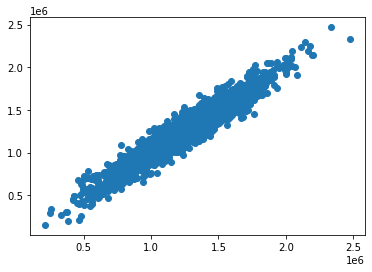

In [57]:
plt.scatter(y_pred,y_test)

In [58]:
#Let's add in the Avg. Area Number of Bedrooms

X = df.drop(labels=['Price','Address'],axis=1)

In [59]:
#normalize the data
X_norm = Xmms.fit_transform(X)

In [60]:
#split the data
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, 
                                                    test_size=0.33, random_state=42)

In [61]:
X_train

array([[0.47911592, 0.49242075, 0.5378348 , 0.93333333, 0.54628125],
       [0.53724407, 0.19421584, 0.38753483, 0.48666667, 0.53701177],
       [0.56801718, 0.48841532, 0.23010815, 0.48222222, 0.42663922],
       ...,
       [0.53833094, 0.56200562, 0.44868938, 0.25333333, 0.53443906],
       [0.45490051, 0.69099829, 0.80193306, 0.51555556, 0.71690439],
       [0.4823524 , 0.47303475, 0.61731809, 0.89777778, 0.51636507]])

In [62]:
model2 = MLPRegressor(hidden_layer_sizes=(9,3),solver='lbfgs',max_iter=10000,random_state=1)

In [63]:
#run the model again
model2.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(9, 3), max_iter=10000, random_state=1,
             solver='lbfgs')

In [64]:
#run the prediction
y_pred = model2.predict(X_test)
y_pred

array([1491621.30461235, 1402761.11053598,  870696.27550393, ...,
        808487.81027445, 1362825.01561403,  775990.11958723])

In [65]:
#check the score
score2 = model2.score(X_test,y_test)
score2

0.9170904366373144

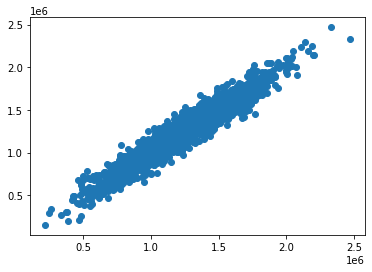

In [66]:
plt.scatter(y_pred,y_test)